In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'E:/data2.csv')

In [4]:
df.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,43195,2021-10-06,285066.0,280000.0,50008.0,50000.0,170072.0,170000.0,NaN,NaN
1,43195,2021-10-07,285377.0,280000.0,50012.0,50000.0,170200.0,170000.0,NaN,NaN
2,43195,2021-10-08,288188.0,280000.0,50016.0,50000.0,169983.0,170000.0,NaN,NaN
3,43195,2021-10-11,285988.0,280000.0,50028.0,50000.0,169866.0,170000.0,NaN,NaN
4,43195,2021-10-12,285988.0,280000.0,50032.0,50000.0,169857.0,170000.0,NaN,NaN


In [5]:
df.shape

(401239, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401239 entries, 0 to 401238
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_id                           401239 non-null  int64  
 1   date                              401239 non-null  object 
 2   Saham_AUM                         266863 non-null  float64
 3   Saham_invested_amount             266863 non-null  float64
 4   Pasar_Uang_AUM                    331442 non-null  float64
 5   Pasar_Uang_invested_amount        331442 non-null  float64
 6   Pendapatan_Tetap_AUM              263801 non-null  float64
 7   Pendapatan_Tetap_invested_amount  263801 non-null  float64
 8   Campuran_AUM                      11219 non-null   float64
 9   Campuran_invested_amount          11219 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 30.6+ MB


In [7]:
df.isna().sum()

user_id                                  0
date                                     0
Saham_AUM                           134376
Saham_invested_amount               134376
Pasar_Uang_AUM                       69797
Pasar_Uang_invested_amount           69797
Pendapatan_Tetap_AUM                137438
Pendapatan_Tetap_invested_amount    137438
Campuran_AUM                        390020
Campuran_invested_amount            390020
dtype: int64

In [8]:
df.fillna(0, inplace = True)

In [9]:
df.drop('date', axis = 1, inplace = True)

In [10]:
df.head()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,43195,285066.0,280000.0,50008.0,50000.0,170072.0,170000.0,0.0,0.0
1,43195,285377.0,280000.0,50012.0,50000.0,170200.0,170000.0,0.0,0.0
2,43195,288188.0,280000.0,50016.0,50000.0,169983.0,170000.0,0.0,0.0
3,43195,285988.0,280000.0,50028.0,50000.0,169866.0,170000.0,0.0,0.0
4,43195,285988.0,280000.0,50032.0,50000.0,169857.0,170000.0,0.0,0.0


In [11]:
df.columns

Index(['user_id', 'Saham_AUM', 'Saham_invested_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount', 'Campuran_AUM',
       'Campuran_invested_amount'],
      dtype='object')

In [12]:
colom = ['Saham_AUM', 'Saham_invested_amount', 'Pasar_Uang_AUM',
       'Pasar_Uang_invested_amount', 'Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount', 'Campuran_AUM',
       'Campuran_invested_amount']

In [13]:
data = df.groupby('user_id')[colom].mean().reset_index()

In [14]:
data.head()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,43195,2.875747e+05,2.800000e+05,50063.444444,50000.000000,1.704109e+05,1.700000e+05,0.000000e+00,0.000000e+00
1,47757,2.751273e+05,2.764706e+05,0.000000,0.000000,7.235454e+06,7.217647e+06,0.000000e+00,0.000000e+00
2,50701,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,9.747644e+06,1.000000e+07
3,50961,4.414667e+06,4.150145e+06,401143.590909,400000.000000,8.016640e+05,8.000000e+05,4.337815e+05,4.545455e+05
4,51883,8.893929e+04,8.238095e+04,18113.666667,18095.238095,8.068681e+04,8.047619e+04,0.000000e+00,0.000000e+00


In [15]:
data1 = data.copy()

In [16]:
scale = MinMaxScaler()
data1.iloc[:,1:] = scale.fit_transform(data.drop('user_id', axis = 1))

In [17]:
data1

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount
0,43195,0.000855,0.000824,0.000042,0.000042,0.000186,0.000188,0.000000,0.000000
1,47757,0.000818,0.000813,0.000000,0.000000,0.007917,0.007965,0.000000,0.000000
2,50701,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037423,0.035583
3,50961,0.013119,0.012206,0.000333,0.000333,0.000877,0.000883,0.001665,0.001617
4,51883,0.000264,0.000242,0.000015,0.000015,0.000088,0.000089,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
14707,4457509,0.000000,0.000000,0.000008,0.000008,0.000000,0.000000,0.000000,0.000000
14708,4457532,0.000000,0.000000,0.000008,0.000008,0.000000,0.000000,0.000000,0.000000
14709,4457596,0.000000,0.000000,0.000008,0.000008,0.000000,0.000000,0.000000,0.000000
14710,4457622,0.000000,0.000000,0.000008,0.000008,0.000000,0.000000,0.000000,0.000000


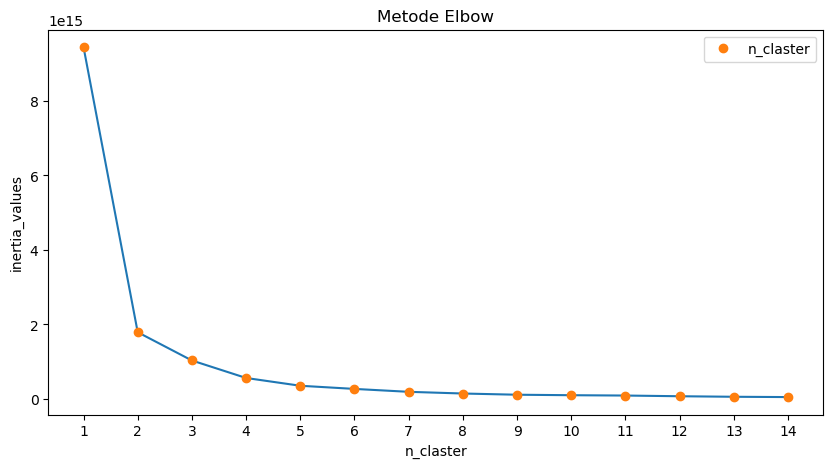

In [18]:
inertia_values = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, n_init = 'auto', algorithm = 'elkan', random_state = 2)
    kmeans.fit(data1)
    inertia_values.append(kmeans.inertia_)
plt.figure(figsize = (10,5))
plt.plot(range(1,15), inertia_values, '-')
plt.plot(range(1,15), inertia_values, 'o', label = 'n_claster')
plt.xlabel('n_claster')
plt.ylabel('inertia_values')
plt.title('Metode Elbow')
plt.xticks(range(1,15))
plt.legend()
plt.show()

In [19]:
kmeans = KMeans(n_clusters = 4, n_init = 'auto', algorithm = 'elkan', random_state = 2)
kmeans.fit(data1)


KMeans(algorithm='elkan', n_clusters=4, n_init='auto', random_state=2)

In [20]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [21]:
data['cluster'] = kmeans.labels_

In [22]:
data.head()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,cluster
0,43195,2.875747e+05,2.800000e+05,50063.444444,50000.000000,1.704109e+05,1.700000e+05,0.000000e+00,0.000000e+00,1
1,47757,2.751273e+05,2.764706e+05,0.000000,0.000000,7.235454e+06,7.217647e+06,0.000000e+00,0.000000e+00,1
2,50701,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,9.747644e+06,1.000000e+07,1
3,50961,4.414667e+06,4.150145e+06,401143.590909,400000.000000,8.016640e+05,8.000000e+05,4.337815e+05,4.545455e+05,1
4,51883,8.893929e+04,8.238095e+04,18113.666667,18095.238095,8.068681e+04,8.047619e+04,0.000000e+00,0.000000e+00,1


In [23]:
kelas_0 = data[data.cluster==0]
kelas_1 = data[data.cluster==1]
kelas_2 = data[data.cluster==2]
kelas_3 = data[data.cluster==3]

In [24]:
kelas_0.describe()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,cluster
count,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6.284000e+03,6284.0
mean,3.850663e+06,4.404080e+05,4.242845e+05,8.474396e+05,8.446104e+05,1.306845e+06,1.301038e+06,2.144117e+05,2.249402e+05,0.0
std,1.650905e+05,2.900906e+06,2.788625e+06,1.628344e+07,1.622456e+07,1.765627e+07,1.754313e+07,3.945638e+06,4.217830e+06,0.0
min,3.104131e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,3.788598e+06,0.000000e+00,0.000000e+00,1.052921e+03,1.052632e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.878414e+06,2.912326e+04,2.833916e+04,1.515761e+04,1.511912e+04,3.013345e+04,3.000000e+04,0.000000e+00,0.000000e+00,0.0
75%,3.963520e+06,1.413922e+05,1.358237e+05,1.039153e+05,1.037022e+05,1.452933e+05,1.450647e+05,0.000000e+00,0.000000e+00,0.0
max,4.045179e+06,1.228075e+08,1.164440e+08,1.206303e+09,1.201963e+09,9.138602e+08,9.062069e+08,2.604747e+08,2.810345e+08,0.0


In [25]:
kelas_1.describe()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,cluster
count,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,6.540000e+02,654.0
mean,8.196092e+05,5.595714e+05,5.468739e+05,4.339229e+05,4.328688e+05,6.940346e+05,6.919322e+05,3.724762e+04,3.843731e+04,1.0
std,4.548386e+05,4.364328e+06,4.338263e+06,2.129272e+06,2.124086e+06,3.628153e+06,3.613258e+06,4.712862e+05,4.845234e+05,0.0
min,4.319500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,4.121898e+05,4.222371e+02,4.199110e+02,5.003375e+03,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
50%,8.501235e+05,5.171637e+04,5.000000e+04,2.000838e+04,2.000000e+04,4.998767e+04,5.000000e+04,0.000000e+00,0.000000e+00,1.0
75%,1.202899e+06,1.851081e+05,1.798214e+05,1.060893e+05,1.057880e+05,1.717201e+05,1.712431e+05,0.000000e+00,0.000000e+00,1.0
max,1.584357e+06,1.027729e+08,1.026449e+08,3.739499e+07,3.732744e+07,6.391061e+07,6.358217e+07,9.747644e+06,1.000000e+07,1.0


In [26]:
kelas_2.describe()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,cluster
count,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,8.230000e+02,823.0
mean,2.353420e+06,4.840787e+05,4.711450e+05,3.429168e+05,3.421345e+05,4.865987e+05,4.848521e+05,4.644354e+04,4.922992e+04,2.0
std,4.417170e+05,5.176947e+06,5.137285e+06,1.957986e+06,1.953271e+06,3.830860e+06,3.808886e+06,7.469165e+05,8.024565e+05,0.0
min,1.589779e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0
25%,1.950967e+06,7.316502e+02,7.389831e+02,5.820610e+03,5.811404e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.0
50%,2.343375e+06,4.978400e+04,5.000000e+04,1.988607e+04,1.983607e+04,3.997450e+04,4.000000e+04,0.000000e+00,0.000000e+00,2.0
75%,2.745636e+06,1.659217e+05,1.627150e+05,1.001925e+05,1.000000e+05,1.298433e+05,1.295505e+05,0.000000e+00,0.000000e+00,2.0
max,3.100104e+06,1.436862e+08,1.430769e+08,3.507954e+07,3.500000e+07,9.660294e+07,9.594286e+07,1.837028e+07,2.000000e+07,2.0


In [27]:
kelas_3.describe()

,user_id,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,cluster
count,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6.951000e+03,6951.0
mean,4.238110e+06,3.841375e+05,3.796067e+05,3.556716e+05,3.551352e+05,5.862636e+05,5.851278e+05,2.963461e+04,2.999629e+04,3.0
std,1.163274e+05,4.745927e+06,4.772497e+06,6.041339e+06,6.027835e+06,8.195561e+06,8.182987e+06,7.240209e+05,7.309870e+05,0.0
min,4.045204e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.0
25%,4.139102e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.0
50%,4.228581e+06,1.035662e+04,1.000000e+04,1.000677e+04,1.000000e+04,9.228385e+03,9.230769e+03,0.000000e+00,0.000000e+00,3.0
75%,4.336754e+06,9.688701e+04,9.333333e+04,5.004170e+04,5.000000e+04,7.166044e+04,7.154762e+04,0.000000e+00,0.000000e+00,3.0
max,4.457700e+06,3.365004e+08,3.400000e+08,4.511117e+08,4.500000e+08,4.559799e+08,4.553846e+08,3.737888e+07,3.732143e+07,3.0
